In [1]:
from datetime import datetime, timedelta
import pandas as pd
import os
import datetime
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### concat all price data files, since they are available on monthly basis

In [2]:


# # Get the path of the directory containing the Excel files
# excel_dir = 'C:/Users/dell/Desktop/disseration/price data'

# # Get a list of all the Excel files in the directory
# excel_files = [os.path.join(excel_dir, f) for f in os.listdir(excel_dir) if f.endswith('.xlsx')]

# # Create an empty list to hold the data frames
# dfs = []

# # Loop through each Excel file and read it into a data frame
# for excel_file in excel_files:
#     df = pd.read_excel(excel_file)
#     dfs.append(df)

# # Concatenate the data frames into a single data frame
# result = pd.concat(dfs)

# # Write the concatenated data frame to an Excel file
# result.to_excel('C:/Users/dell/Desktop/disseration/file.xlsx', index=False)


In [3]:
df_price = pd.read_excel('C:/Users/dell/Desktop/disseration/Final data.xlsx')

df_price  = df_price.set_index('Date')
df_price.tail()

,MCP
Date,
2022-12-27,6548.15
2022-12-28,5958.41
2022-12-29,6191.27
2022-12-30,6218.76
2022-12-31,6564.50


<AxesSubplot: xlabel='Date'>

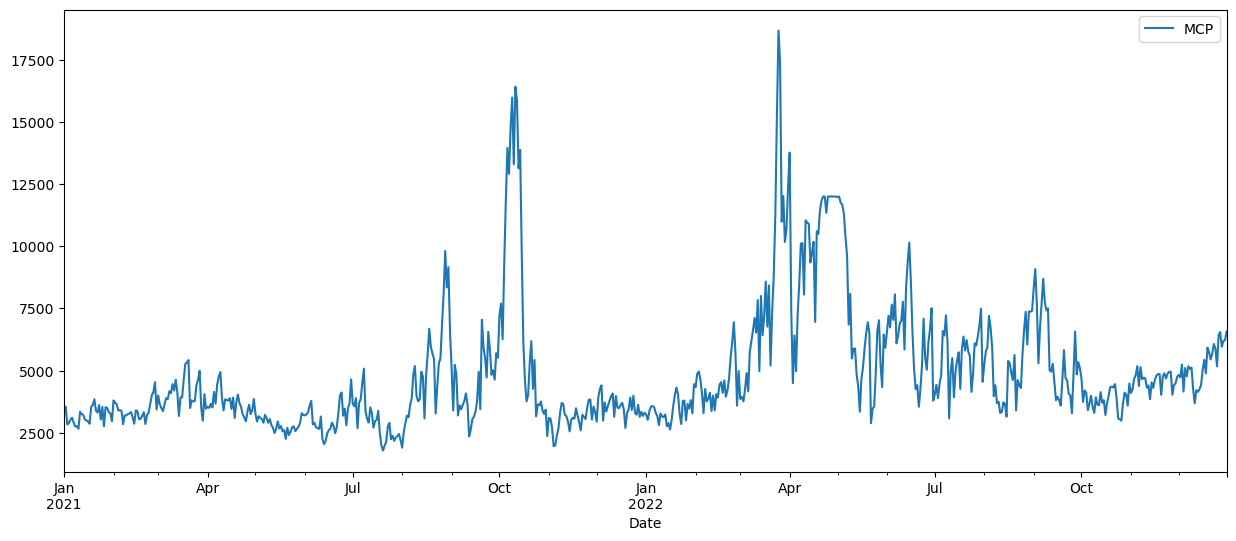

In [4]:
df_price.plot( y='MCP', figsize = (15,6))

# T_max data compile

In [5]:
tmax_2022 = pd.read_csv('C:/Users/dell/Desktop/disseration/weather data/tmax_2022.csv')
tmax_2022 = tmax_2022.T
# Set the first row as column names
tmax_2022.columns = tmax_2022.iloc[0]+'_tmax'
# Drop the first row as it is no longer needed
tmax_2022 = tmax_2022[1:]
tmax_2022 = tmax_2022.reset_index()
tmax_2022['index'] = tmax_2022['index'].astype(int)
tmax_2022['Date'] = tmax_2022['index'].apply(lambda x: datetime.datetime(2022, 1, 1) + datetime.timedelta(days=x - 1))
tmax_2022 = tmax_2022.drop('index',axis=1)
tmax_2022 = tmax_2022.set_index('Date')
tmax_2022 = tmax_2022.drop(tmax_2022.columns[tmax_2022.eq(-9999).all()], axis=1)
tmax_2022.tail()


tmax_2021 = pd.read_csv('C:/Users/dell/Desktop/disseration/weather data/tmax_2021.csv')
tmax_2021 = tmax_2021.T
# Set the first row as column names
tmax_2021.columns = tmax_2021.iloc[0]+'_tmax'
# Drop the first row as it is no longer needed
tmax_2021 = tmax_2021[1:]
tmax_2021 = tmax_2021.reset_index()
tmax_2021['index'] = tmax_2021['index'].astype(int)
tmax_2021['Date'] = tmax_2021['index'].apply(lambda x: datetime.datetime(2021, 1, 1) + datetime.timedelta(days=x - 1))
tmax_2021 = tmax_2021.drop('index',axis=1)
tmax_2021 = tmax_2021.set_index('Date')
tmax_2021 = tmax_2021.drop(tmax_2021.columns[tmax_2021.eq(-9999).all()], axis=1)
tmax_2021.tail()

df_tmax = pd.concat([tmax_2021, tmax_2022], axis=0)
df_tmax.tail()





XY,"73.5, 8.5_tmax","76.5, 8.5_tmax","77.5, 8.5_tmax","78.5, 8.5_tmax","76.5, 9.5_tmax","77.5, 9.5_tmax","78.5, 9.5_tmax","79.5, 9.5_tmax","75.5, 10.5_tmax","76.5, 10.5_tmax",...,"75.5, 35.5_tmax","76.5, 35.5_tmax","77.5, 35.5_tmax","78.5, 35.5_tmax","79.5, 35.5_tmax","72.5, 36.5_tmax","73.5, 36.5_tmax","74.5, 36.5_tmax","75.5, 36.5_tmax","93.5, 37.5_tmax"
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-27,32.277748,30.606812,32.032288,31.415554,30.697998,30.274725,29.631317,30.56881,29.637205,27.304737,...,11.072631,10.74057,10.726887,10.990767,11.023271,11.149276,9.72674,10.684262,12.021741,NaN
2022-12-28,32.282227,30.667341,31.846952,31.231745,30.688593,30.287266,29.63344,30.804125,30.143559,28.340147,...,12.353745,11.534445,11.521132,12.022562,11.979451,12.071626,10.80917,11.887707,12.979679,NaN
2022-12-29,33.166077,31.588993,32.637978,31.892551,31.755917,31.248293,30.208738,31.39366,30.946194,29.443821,...,7.443397,7.154585,7.163198,6.755525,6.02886,6.847181,5.606704,6.616257,7.568542,NaN
2022-12-30,32.918762,31.325037,32.58873,32.095207,31.422108,31.012726,30.406284,31.30039,30.449886,28.746679,...,9.905938,9.241557,9.240184,8.742099,7.259986,9.453488,8.153589,9.031889,9.630888,NaN
2022-12-31,32.810677,31.403736,32.543694,31.95624,31.509762,31.116213,30.581371,31.376793,30.622911,28.802925,...,10.195481,10.176878,10.216757,9.123085,7.930119,8.776995,7.594695,8.412925,9.887367,NaN



# tmax data to PCA


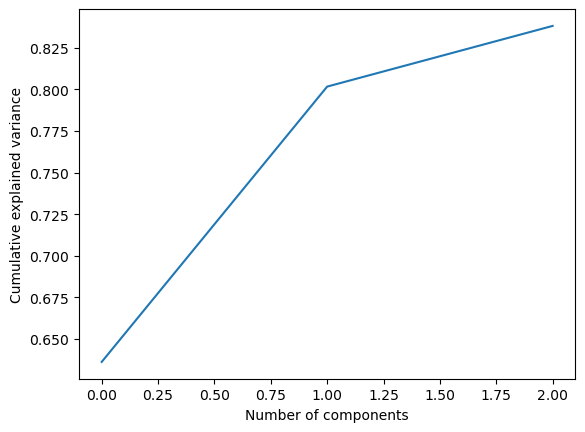

[[ 26.15011076  -4.09121914   1.0069723 ]
 [ 24.54778531  -3.98727347   1.37424648]
 [ 23.58278917  -3.55332328   3.14147891]
 ...
 [ 20.34338285 -12.93926608   2.02830688]
 [ 19.41075274 -11.06643678   1.11049891]
 [ 22.85048815 -10.57518001  -0.46198307]]


In [6]:

# Create a sample dataframe
df = df_tmax.fillna(0)

# Standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA on the standardized data
pca = PCA(n_components=3)
pca_tmax = pca.fit_transform(df_std)

# Create a new dataframe with the PCA results
# pca_df = pd.Data3rame(data = pca_df, columns = ['PC1', 'PC2'])

# Create a plot of the cumulative variance explained by each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print(pca_tmax)


# T_min data compile 

In [7]:
tmin_2021 = pd.read_csv('C:/Users/dell/Desktop/disseration/weather data/tmin_2021.csv')
tmin_2021 = tmin_2021.T
# Set the first row as column names
tmin_2021.columns = tmin_2021.iloc[0]+'_tmin'
# Drop the first row as it is no longer needed
tmin_2021 = tmin_2021[1:]
tmin_2021 = tmin_2021.reset_index()
tmin_2021['index'] = tmin_2021['index'].astype(int)
tmin_2021['Date'] = tmin_2021['index'].apply(lambda x: datetime.datetime(2021, 1, 1) + datetime.timedelta(days=x - 1))
tmin_2021 = tmin_2021.drop('index',axis=1)
tmin_2021 = tmin_2021.set_index('Date')
tmin_2021 = tmin_2021.drop(tmin_2021.columns[tmin_2021.eq(-9999).all()], axis=1)
tmin_2021.tail()


tmin_2022 = pd.read_csv('C:/Users/dell/Desktop/disseration/weather data/tmin_2022.csv')
tmin_2022 = tmin_2022.T
# Set the first row as column names
tmin_2022.columns = tmin_2022.iloc[0]+'_tmin'
# Drop the first row as it is no longer needed
tmin_2022 = tmin_2022[1:]
tmin_2022 = tmin_2022.reset_index()
tmin_2022['index'] = tmin_2022['index'].astype(int)
tmin_2022['Date'] = tmin_2022['index'].apply(lambda x: datetime.datetime(2022, 1, 1) + datetime.timedelta(days=x - 1))
tmin_2022 = tmin_2022.drop('index',axis=1)
tmin_2022 = tmin_2022.set_index('Date')
tmin_2022 = tmin_2022.drop(tmin_2022.columns[tmin_2022.eq(-9999).all()], axis=1)
tmin_2022.tail()


df_tmin = pd.concat([tmin_2021, tmin_2022], axis=0)
df_tmin.head()

XY,"73.5, 8.5_tmin","76.5, 8.5_tmin","77.5, 8.5_tmin","78.5, 8.5_tmin","76.5, 9.5_tmin","77.5, 9.5_tmin","78.5, 9.5_tmin","79.5, 9.5_tmin","75.5, 10.5_tmin","76.5, 10.5_tmin",...,"74.5, 35.5_tmin","75.5, 35.5_tmin","76.5, 35.5_tmin","77.5, 35.5_tmin","78.5, 35.5_tmin","79.5, 35.5_tmin","72.5, 36.5_tmin","73.5, 36.5_tmin","74.5, 36.5_tmin","75.5, 36.5_tmin"
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,23.389149,21.707354,22.544445,22.384274,21.257229,21.025757,20.645063,21.736322,19.974537,17.527277,...,-2.725468,-2.762107,-2.290563,-2.296914,-4.123918,-4.447982,-2.454738,-4.040328,-3.52871,-2.962796
2021-01-02,22.956039,21.298826,22.383574,22.258455,20.837156,20.787752,20.487654,21.875025,19.411316,17.2285,...,-2.312341,-2.354288,-2.351629,-2.36776,-3.760988,-4.538774,-2.172121,-3.699116,-3.05596,-2.574378
2021-01-03,23.426226,22.408581,23.336575,23.224215,21.954672,21.827719,21.60331,23.024321,20.818722,18.90494,...,-0.441891,-0.491394,-0.63379,-0.663324,-1.915438,-2.475198,-0.175453,-1.795221,-1.154783,-0.638961
2021-01-04,23.678965,22.633099,23.369585,23.592505,22.221865,22.061586,21.795265,23.233118,21.409073,19.367331,...,2.030229,1.98087,1.546142,1.516981,-0.291442,-1.71087,1.91806,0.383496,0.989206,1.094635
2021-01-05,23.815407,22.501856,23.52165,23.627354,22.0285,21.980431,21.822561,23.32272,21.20826,19.118387,...,3.121361,3.071767,2.618801,2.595921,0.356886,-1.000907,2.648046,1.202717,1.864931,1.83871


# tmin data to PCA


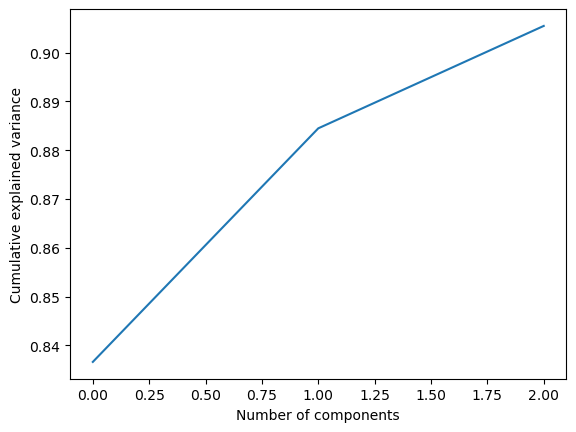

[[30.48725379 -3.40144363 -0.36896823]
 [29.79097574  0.53887091  0.0770671 ]
 [25.94830286 -1.34245967 -0.61927628]
 ...
 [24.76854962 -5.22807907 -0.82274831]
 [25.00663613 -1.63220888 -0.35858064]
 [27.09026607  1.37496784  0.10793729]]


In [8]:
# Create a sample dataframe
df = df_tmin.fillna(0)

# Standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA on the standardized data
pca = PCA(n_components=3)
pca_tmin = pca.fit_transform(df_std)

# Create a new dataframe with the PCA results
# pca_df = pd.Data3rame(data = pca_df, columns = ['PC1', 'PC2'])

# Create a plot of the cumulative variance explained by each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print(pca_tmin)


# rain data compile

In [9]:
rain_2021 = pd.read_csv('C:/Users/dell/Desktop/disseration/weather data/rain_2021.csv')
rain_2021 = rain_2021.T
# Set the first row as column names
rain_2021.columns = rain_2021.iloc[0]+'_rain'
# Drop the first row as it is no longer needed
rain_2021 = rain_2021[1:]
rain_2021 = rain_2021.reset_index()
rain_2021['index'] = rain_2021['index'].astype(int)
rain_2021['Date'] = rain_2021['index'].apply(lambda x: datetime.datetime(2021, 1, 1) + datetime.timedelta(days=x - 1))
rain_2021 = rain_2021.drop('index',axis=1)
rain_2021 = rain_2021.set_index('Date')
rain_2021 = rain_2021.drop(rain_2021.columns[rain_2021.eq(-9999).all()], axis=1)
rain_2021.tail()


rain_2022 = pd.read_csv('C:/Users/dell/Desktop/disseration/weather data/rain_2022.csv')
rain_2022 = rain_2022.T
# Set the first row as column names
rain_2022.columns = rain_2022.iloc[0]+'_rain'
# Drop the first row as it is no longer needed
rain_2022 = rain_2022[1:]
rain_2022 = rain_2022.reset_index()
rain_2022['index'] = rain_2022['index'].astype(int)
rain_2022['Date'] = rain_2022['index'].apply(lambda x: datetime.datetime(2022, 1, 1) + datetime.timedelta(days=x - 1))
rain_2022 = rain_2022.drop('index',axis=1)
rain_2022 = rain_2022.set_index('Date')
rain_2022 = rain_2022.drop(rain_2022.columns[rain_2022.eq(-9999).all()], axis=1)
rain_2022.tail()



df_rain = pd.concat([rain_2021, rain_2022], axis=0)
df_rain.head()

XY,"77, 8.25_rain","77.25, 8.25_rain","77.5, 8.25_rain","77.75, 8.25_rain","76.75, 8.5_rain","77, 8.5_rain","77.25, 8.5_rain","77.5, 8.5_rain","77.75, 8.5_rain","78, 8.5_rain",...,"74.5, 37_rain","74.75, 37_rain","75, 37_rain","75.25, 37_rain","75.5, 37_rain","74.5, 37.25_rain","74.75, 37.25_rain","75, 37.25_rain","75.25, 37.25_rain","98.75, 38.5_rain"
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,2.326143,3.664898,18.975653,18.582087,3.746353,9.854014,36.62709,24.80864,14.155417,23.033096,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2021-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.52625,0.805012,1.083717,1.288753,1.349589,0.360935,0.582974,0.833345,1.061049,NaN
2021-01-04,1.322984,0.0,2.973083,2.183249,2.663133,10.494207,1.695231,3.00297,1.99413,0.632081,...,1.9679,2.152577,2.21969,2.226122,2.220401,1.579342,1.86596,2.042825,2.134474,NaN
2021-01-05,4.881387,1.788203,0.0,3.511944,8.128388,8.613123,18.138222,0.23127,2.336374,14.185285,...,3.349782,3.755291,3.974741,4.071956,4.276309,2.666382,3.210836,3.592789,3.832372,NaN


# rain data to PCA

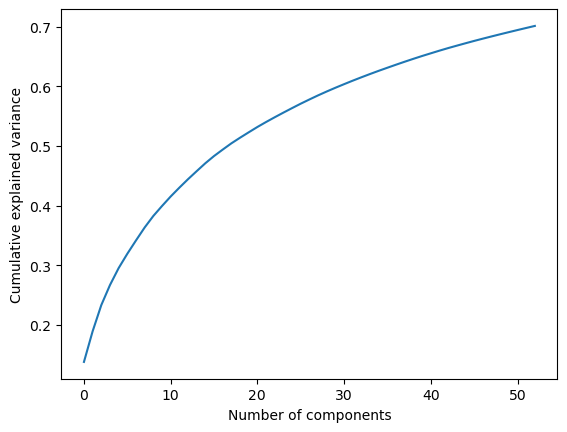

[[-21.26617129  -4.31355191   3.01469035 ...   1.34971323  -0.46768193
   -1.17747056]
 [-20.88710382  -3.29037231   5.54009729 ...   0.23098434   0.239218
    0.16924093]
 [-17.46340267   4.66964943  13.32992498 ...   0.70174547  -0.7058704
    0.41650004]
 ...
 [-21.01567929  -3.43764883   5.06952779 ...   0.36688169   0.0971457
    0.03449289]
 [-17.13495917   7.26298147  24.75965413 ...   1.43730392   2.7914419
    0.96070607]
 [-20.03271032  -0.62905994   8.07724575 ...   0.37178023   0.68008173
    0.21351448]]


In [10]:
df = df_rain.fillna(0)
df = df.loc[:, (df != 0).any(axis=0)]
df.shape

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create a sample dataframe
# df = df_rain.fillna(0)

# Standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA on the standardized data
pca = PCA(n_components=53)
pca_rain = pca.fit_transform(df_std)

# Create a new dataframe with the PCA results
# pca_df = pd.DataFrame(data = pca_df, columns = ['PC1', 'PC2'])

# Create a plot of the cumulative variance explained by each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print(pca_rain)


In [11]:
# convert pca_df numpy array to pandas DataFrame
pca_rain1 = pd.DataFrame(data=pca_rain, columns=[f"PC_rain{i}" for i in range(1, 54)], index=df_price.index)
pca_tmin1 = pd.DataFrame(data=pca_tmin, columns=[f"PC_tmin{i}" for i in range(1, 4)], index=df_price.index)
pca_tmax1 = pd.DataFrame(data=pca_tmax, columns=[f"PC_tmax{i}" for i in range(1, 4)], index=df_price.index)

# concatenate the two DataFrames
result_df = pd.concat([df_price, pca_rain1], axis=1)
result_df = pd.concat([result_df, pca_tmin1], axis=1)
final_df = pd.concat([result_df, pca_tmax1], axis=1)
final_df.head()

,MCP,PC_rain1,PC_rain2,PC_rain3,PC_rain4,PC_rain5,PC_rain6,PC_rain7,PC_rain8,PC_rain9,...,PC_rain50,PC_rain51,PC_rain52,PC_rain53,PC_tmin1,PC_tmin2,PC_tmin3,PC_tmax1,PC_tmax2,PC_tmax3
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3268.34,-21.266171,-4.313552,3.014690,3.244470,0.291415,5.572012,2.956230,-1.810250,2.645991,...,-0.338641,1.349713,-0.467682,-1.177471,30.487254,-3.401444,-0.368968,26.150111,-4.091219,1.006972
2021-01-02,3546.05,-20.887104,-3.290372,5.540097,5.621648,-1.858190,1.513024,-2.560670,-2.687907,2.937303,...,0.099378,0.230984,0.239218,0.169241,29.790976,0.538871,0.077067,24.547785,-3.987273,1.374246
2021-01-03,2836.93,-17.463403,4.669649,13.329925,-3.271665,-2.400398,1.360517,-2.959798,-1.203030,0.448102,...,-1.002675,0.701745,-0.705870,0.416500,25.948303,-1.342460,-0.619276,23.582789,-3.553323,3.141479
2021-01-04,2888.83,-13.912759,7.311908,16.030225,-6.070790,3.378868,3.880589,-2.741379,0.907715,-10.860691,...,0.574262,-1.655083,-5.644394,-0.929437,22.012093,-2.484505,-0.669613,22.549081,-0.616717,1.716000
2021-01-05,3030.45,-10.026440,10.402629,25.992325,-16.118522,1.783511,-2.897196,-0.387846,6.475468,-17.271414,...,-0.836414,-4.052126,-4.006022,2.730467,18.705796,-1.462914,-0.470128,22.365211,-1.175633,-1.314961


# Testing for stationarity


In [12]:
from statsmodels.tsa.stattools import adfuller
# statsmodels.graphics.tsa
import statsmodels
adtest = adfuller(final_df['MCP'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(final_df['MCP'])

ADF Test Statistic : -3.1577064303701077
p-value : 0.02256707298218352
#Lags Used : 20
Number of Observations Used : 709
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


p- AR model lags - pacf -3/4
d - differencing - 0 
q - MA model lags - acf - 22/23/24


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


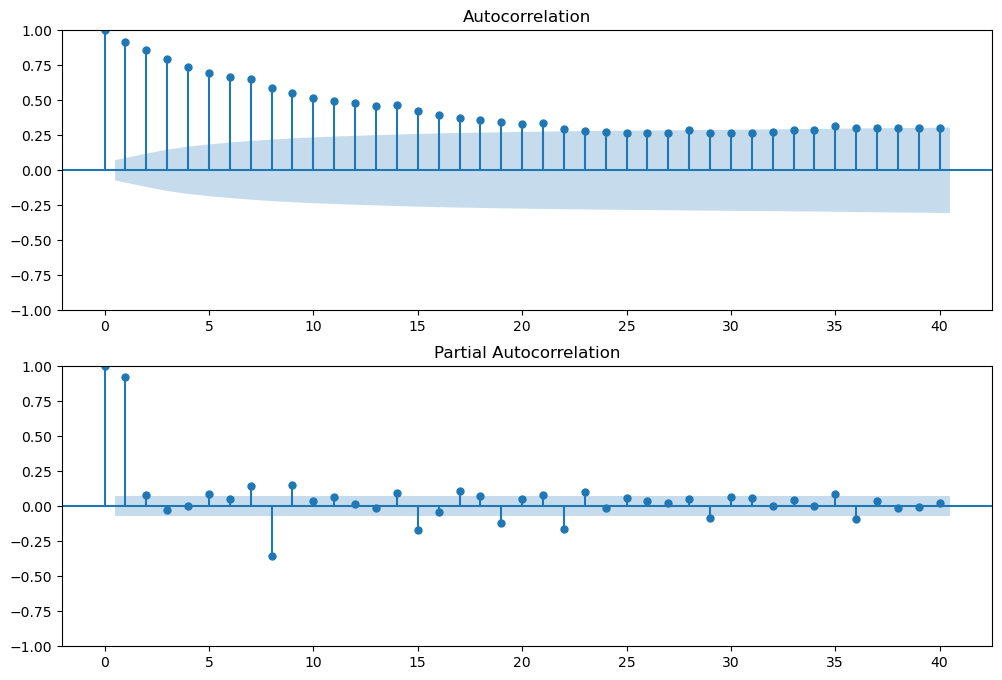

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(final_df['MCP'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(final_df['MCP'],lags=40,ax=ax2)

In [14]:
exog_data = final_df.iloc[:,1:]
endog_data = final_df.loc[:,'MCP']
endog_data

Date
2021-01-01    3268.34
2021-01-02    3546.05
2021-01-03    2836.93
2021-01-04    2888.83
2021-01-05    3030.45
               ...   
2022-12-27    6548.15
2022-12-28    5958.41
2022-12-29    6191.27
2022-12-30    6218.76
2022-12-31    6564.50
Name: MCP, Length: 730, dtype: float64

In [15]:
import pmdarima as pm

# fit ARIMAX model and find optimal order for multiple exogenous variables
exog_order = pm.auto_arima(endog_data, exogenous=exog_data, start_p=0, start_q=0, max_p=3, max_q=3, seasonal=False, d=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False).order


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12147.158, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12138.748, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12140.663, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12139.474, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12138.935, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12127.260, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12140.850, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12116.759, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12142.065, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec

Best model:  ARIMA(2,1,2)(0,0,

In [16]:
import pmdarima as pm

# fit ARIMAX model and find optimal order for multiple exogenous variables
exog_order = pm.auto_arima(endog_data, exogenous=exog_data, start_p=0, start_q=0, max_p=3, max_q=3, seasonal=False, d=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True).order


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12147.158, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12138.935, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12138.748, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12145.173, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12140.663, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=12136.768, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=12120.547, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=12136.955, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=12138.683, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=12138.871, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                    MCP   No. Observations:                  584
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4833.891
Date:                Sat, 25 Mar 2023   AIC                           9795.782
Time:                        17:38:25   BIC                          10075.346
Sample:                    01-01-2021   HQIC                          9904.751
                         - 08-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PC_rain1       0.6094      9.175      0.066      0.947     -17.374      18.592
PC_rain2       4.7493      6.824      0.696      0.486      -8.625      18.124
PC_rain3      -7.0523      6.750     -1.045      0.2

<AxesSubplot: xlabel='Date'>

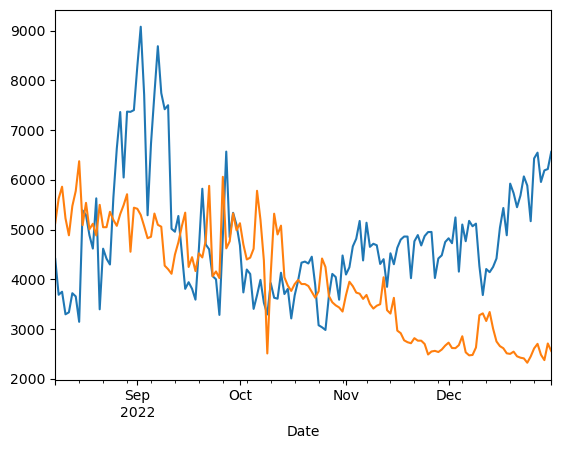

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit


# split the data into training and test sets
train_size = int(len(final_df) * 0.8)
train_data = final_df.iloc[:train_size]
test_data = final_df.iloc[train_size:]

# define the endogenous and exogenous variables for training and testing

train_endog_data = train_data['MCP']
train_exog_data = train_data.drop('MCP', axis=1)
test_endog_data = test_data['MCP']
test_exog_data = test_data.drop('MCP', axis=1)

# fit an ARIMAX model
model = sm.tsa.ARIMA(endog=train_endog_data, exog=train_exog_data, order=(2,1,2))
results = model.fit()

# print model summary
print(results.summary())

# make predictions for the test set
forecast = results.forecast(steps=len(test_data), exog=test_exog_data)

# evaluate the model performance
rmse = ((((test_endog_data - forecast)**2).mean())**0.5)
print(rmse)

test_endog_data.plot()
forecast.plot()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    MCP   No. Observations:                  584
Model:                ARIMA(3, 0, 23)   Log Likelihood               -4905.898
Date:                Sat, 25 Mar 2023   AIC                           9985.796
Time:                        17:39:05   BIC                          10365.978
Sample:                    01-01-2021   HQIC                         10133.972
                         - 08-07-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4816.0574        nan        nan        nan         nan         nan
PC_rain1     -10.0978      2.913     -3.467      0.001     -15.807      -4.389
PC_rain2      -5.7985      3.851     -1.506      0.1

<AxesSubplot: xlabel='Date'>

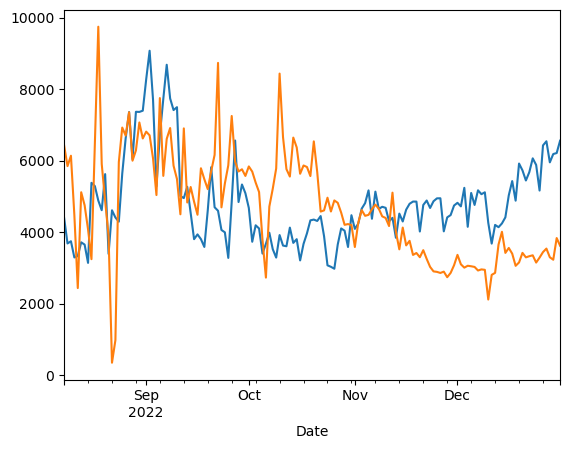

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit


# split the data into training and test sets
train_size = int(len(final_df) * 0.8)
train_data = final_df.iloc[:train_size]
test_data = final_df.iloc[train_size:]

# define the endogenous and exogenous variables for training and testing

train_endog_data = train_data['MCP']
train_exog_data = train_data.drop('MCP', axis=1)
test_endog_data = test_data['MCP']
test_exog_data = test_data.drop('MCP', axis=1)

# fit an ARIMAX model
model = sm.tsa.ARIMA(endog=train_endog_data, exog=train_exog_data, order=(3,0,23))
results = model.fit()

# print model summary
print(results.summary())

# make predictions for the test set
forecast = results.forecast(steps=len(test_data), exog=test_exog_data)

# evaluate the model performance
rmse = ((((test_endog_data - forecast)**2).mean())**0.5)
print('RMSE: ',rmse)

test_endog_data.plot()
forecast.plot()

In [19]:
final_df.head()

,MCP,PC_rain1,PC_rain2,PC_rain3,PC_rain4,PC_rain5,PC_rain6,PC_rain7,PC_rain8,PC_rain9,...,PC_rain50,PC_rain51,PC_rain52,PC_rain53,PC_tmin1,PC_tmin2,PC_tmin3,PC_tmax1,PC_tmax2,PC_tmax3
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3268.34,-21.266171,-4.313552,3.014690,3.244470,0.291415,5.572012,2.956230,-1.810250,2.645991,...,-0.338641,1.349713,-0.467682,-1.177471,30.487254,-3.401444,-0.368968,26.150111,-4.091219,1.006972
2021-01-02,3546.05,-20.887104,-3.290372,5.540097,5.621648,-1.858190,1.513024,-2.560670,-2.687907,2.937303,...,0.099378,0.230984,0.239218,0.169241,29.790976,0.538871,0.077067,24.547785,-3.987273,1.374246
2021-01-03,2836.93,-17.463403,4.669649,13.329925,-3.271665,-2.400398,1.360517,-2.959798,-1.203030,0.448102,...,-1.002675,0.701745,-0.705870,0.416500,25.948303,-1.342460,-0.619276,23.582789,-3.553323,3.141479
2021-01-04,2888.83,-13.912759,7.311908,16.030225,-6.070790,3.378868,3.880589,-2.741379,0.907715,-10.860691,...,0.574262,-1.655083,-5.644394,-0.929437,22.012093,-2.484505,-0.669613,22.549081,-0.616717,1.716000
2021-01-05,3030.45,-10.026440,10.402629,25.992325,-16.118522,1.783511,-2.897196,-0.387846,6.475468,-17.271414,...,-0.836414,-4.052126,-4.006022,2.730467,18.705796,-1.462914,-0.470128,22.365211,-1.175633,-1.314961


# XGBoost 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

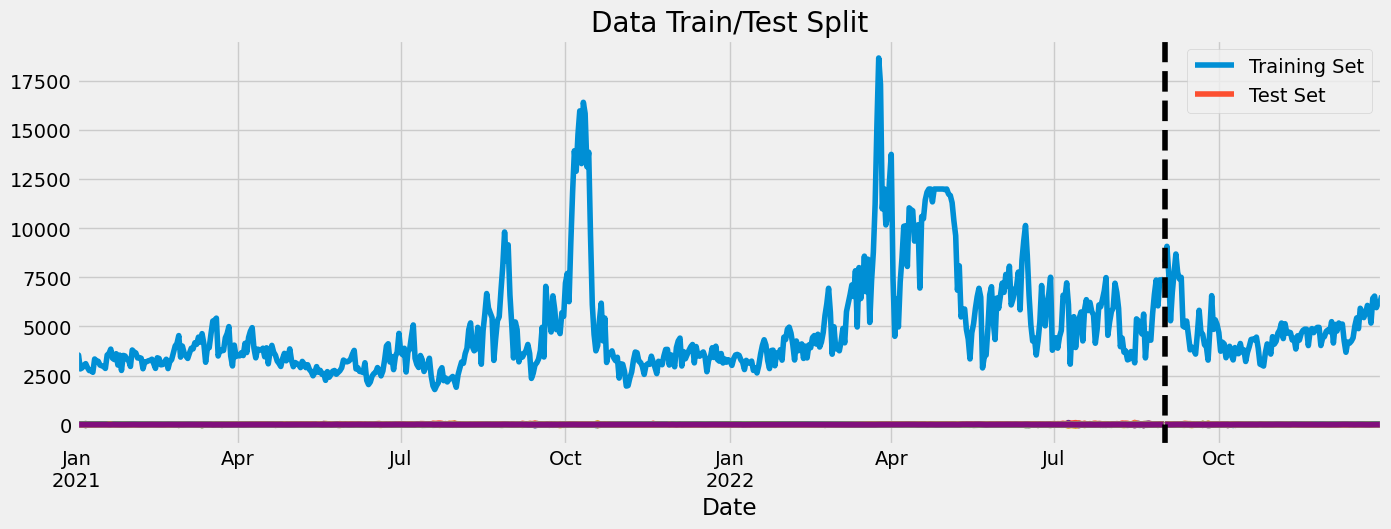

In [21]:
train = final_df.loc[df.index < '2022-09-01']
test = final_df.loc[df.index >= '2022-09-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2022-09-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [22]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
#     df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

final_df = create_features(final_df)


In [23]:
final_df['weekofyear'] = final_df['weekofyear'].astype('int')
train = final_df.loc[df.index < '2022-09-01']
test = final_df.loc[df.index >= '2022-09-01']


In [24]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]



In [25]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=800,
                       early_stopping_rounds=100,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose=50)

[17:39:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5504.75238	validation_1-rmse:4910.77178
[50]	validation_0-rmse:3489.30872	validation_1-rmse:3055.43670
[100]	validation_0-rmse:2250.35388	validation_1-rmse:2059.48476
[150]	validation_0-rmse:1499.79786	validation_1-rmse:1593.52153
[200]	validation_0-rmse:1054.88586	validation_1-rmse:1451.37599
[250]	validation_0-rmse:790.53547	validation_1-rmse:1422.40399
[300]	validation_0-rmse:614.47565	validation_1-rmse:1403.57243
[350]	validation_0-rmse:504.07036	validation_1-rmse:1407.56185
[400]	validation_0-rmse:438.24768	validation_1-rmse:1415.58972
[419]	validation_0-rmse:417.45780	validation_1-rmse:1417.94129


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

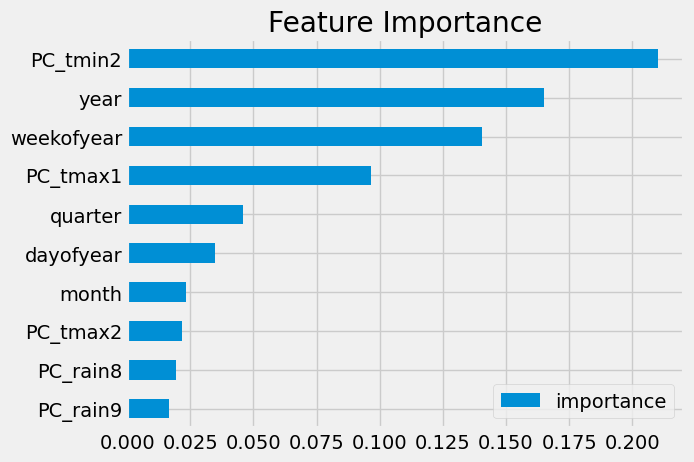

In [26]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi = fi.sort_values('importance')[-10:].copy()
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_22644\3055248015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


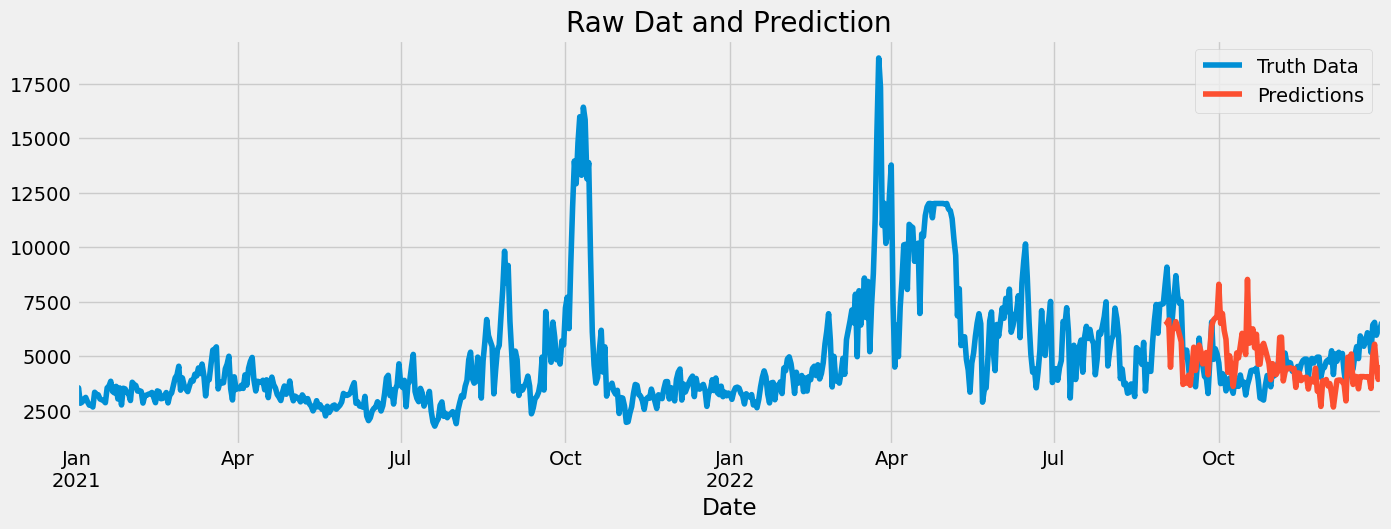

In [27]:
test['prediction'] = reg.predict(X_test)
df = final_df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['MCP']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

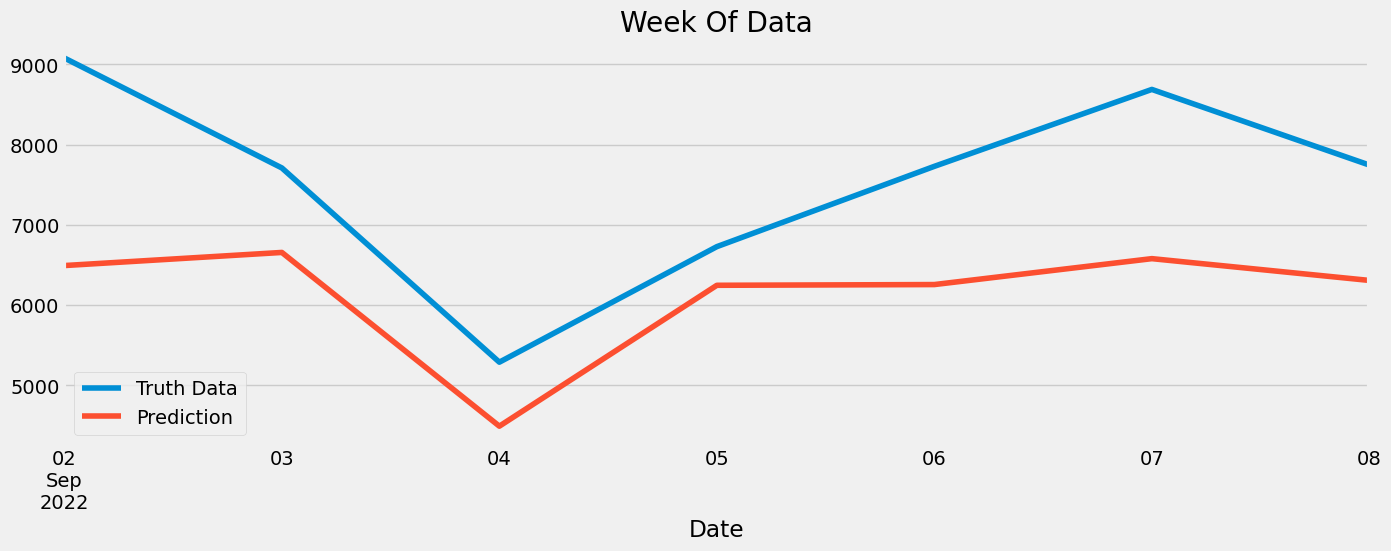

In [28]:
ax = df.loc[(df.index > '2022-09-01') & (df.index < '2022-09-09')]['MCP'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '2022-09-01') & (df.index < '2022-09-09')]['prediction'] \
    .plot(style='-')
plt.legend(['Truth Data','Prediction'])
plt.show()

# Collating data for national coal index(from ministry of coal), publicly listed coal companies(close price&Volume), import export data (from IEC)

In [29]:
pip install nsepy

Note: you may need to restart the kernel to use updated packages.


In [30]:
from datetime import date
from nsepy import get_history

# Set the start and end date for the data
start_date = date(2021, 1, 1)
end_date = date(2022, 12, 31)

# Get the historical data for a particular stock
CIL = get_history(symbol='COALINDIA',
                   start=start_date,
                   end=end_date)
# Print the data
CIL = pd.DataFrame(CIL)
CIL = CIL[['Close','Volume']]
symbol = 'CIL'
CIL = CIL.rename(columns={'Close': symbol+'_Close', 'Volume': symbol+'_Volume'})
CIL.head()

,CIL_Close,CIL_Volume
Date,,
2021-01-01,135.35,6995084
2021-01-04,137.25,11669647
2021-01-05,135.15,12371842
2021-01-06,135.10,14133415
2021-01-07,136.50,17298525


In [31]:
symbol = 'NLCINDIA'
# Get the historical data for a particular stock
NLCINDIA = get_history(symbol=symbol,
                   start=start_date,
                   end=end_date)
# Print the data
NLCINDIA = pd.DataFrame(NLCINDIA)
NLCINDIA = NLCINDIA[['Close','Volume']]
NLCINDIA = NLCINDIA.rename(columns={'Close': symbol+'_Close', 'Volume': symbol+'_Volume'})
NLCINDIA.head()

,NLCINDIA_Close,NLCINDIA_Volume
Date,,
2021-01-01,55.70,491396
2021-01-04,56.10,972656
2021-01-05,56.25,921591
2021-01-06,55.60,1001817
2021-01-07,55.35,895790


In [32]:

symbol = 'GMDCLTD'
# Get the historical data for a particular stock
GMDCLTD = get_history(symbol=symbol,
                   start=start_date,
                   end=end_date)
# Print the data
GMDCLTD = pd.DataFrame(GMDCLTD)
GMDCLTD = GMDCLTD[['Close','Volume']]
GMDCLTD = GMDCLTD.rename(columns={'Close': symbol+'_Close', 'Volume': symbol+'_Volume'})
GMDCLTD.head()

,GMDCLTD_Close,GMDCLTD_Volume
Date,,
2021-01-01,54.90,4827521
2021-01-04,58.60,9301814
2021-01-05,61.25,8896108
2021-01-06,59.35,3771097
2021-01-07,59.70,2059334


In [33]:
coal_data = pd.read_excel('C:/Users/dell/Desktop/disseration/coal collated.xls.xlsx',index_col= 'Date')
coal_data.head()

,Coal Imported by Imported Coal based Plants,Coal Imported for Blending Purpose,Total Coal Import,NCI1,NCI2,NCI3,NCI4,NCI5,NCI6,NCI7,NCI8
Date,,,,,,,,,,,
2021-01-01,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32
2021-01-02,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32
2021-01-03,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32
2021-01-04,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32
2021-01-05,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32


In [34]:
CIL
NLCINDIA
GMDCLTD

,GMDCLTD_Close,GMDCLTD_Volume
Date,,
2021-01-01,54.90,4827521
2021-01-04,58.60,9301814
2021-01-05,61.25,8896108
2021-01-06,59.35,3771097
2021-01-07,59.70,2059334
...,...,...
2022-12-26,135.95,1107367
2022-12-27,140.00,1093814
2022-12-28,144.10,1447936


In [35]:
coal_merge = pd.merge(CIL, NLCINDIA, left_index=True, right_index=True)
coal_merge = pd.merge(coal_merge, GMDCLTD, left_index=True, right_index=True)
coal_merge.index = pd.to_datetime(coal_merge.index)
coal_merge = pd.concat([coal_data,coal_merge], axis=1)

# replace NaNs in column A with the last non-NaN value
coal_merge[[ 'CIL_Close', 'CIL_Volume', 'NLCINDIA_Close', 'NLCINDIA_Volume', 'GMDCLTD_Close','GMDCLTD_Volume']] =coal_merge[[ 'CIL_Close', 'CIL_Volume', 'NLCINDIA_Close', 'NLCINDIA_Volume', 'GMDCLTD_Close','GMDCLTD_Volume']].fillna(method='ffill')
coal_merge.head()

,Coal Imported by Imported Coal based Plants,Coal Imported for Blending Purpose,Total Coal Import,NCI1,NCI2,NCI3,NCI4,NCI5,NCI6,NCI7,NCI8,CIL_Close,CIL_Volume,NLCINDIA_Close,NLCINDIA_Volume,GMDCLTD_Close,GMDCLTD_Volume
Date,,,,,,,,,,,,,,,,,
2021-01-01,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32,135.35,6995084.0,55.70,491396.0,54.90,4827521.0
2021-01-02,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32,135.35,6995084.0,55.70,491396.0,54.90,4827521.0
2021-01-03,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32,135.35,6995084.0,55.70,491396.0,54.90,4827521.0
2021-01-04,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32,137.25,11669647.0,56.10,972656.0,58.60,9301814.0
2021-01-05,3.023866,0.849878,3.873744,95.44,102.19,75.99,107.16,100.68,87.86,66.12,115.32,135.15,12371842.0,56.25,921591.0,61.25,8896108.0


In [36]:
# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the dataframe
coal_merge = pd.DataFrame(scaler.fit_transform(coal_merge), columns=coal_merge.columns)


In [37]:
coal_merge = coal_merge.set_index(final_df.index)

# merging final data with coal data

In [38]:
final_df = pd.concat([final_df,coal_merge], axis=1)
final_df.head()

,MCP,PC_rain1,PC_rain2,PC_rain3,PC_rain4,PC_rain5,PC_rain6,PC_rain7,PC_rain8,PC_rain9,...,NCI5,NCI6,NCI7,NCI8,CIL_Close,CIL_Volume,NLCINDIA_Close,NLCINDIA_Volume,GMDCLTD_Close,GMDCLTD_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3268.34,-21.266171,-4.313552,3.014690,3.244470,0.291415,5.572012,2.956230,-1.810250,2.645991,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.147633,-0.626226,-0.899650,-0.614152,-1.153752,0.398913
2021-01-02,3546.05,-20.887104,-3.290372,5.540097,5.621648,-1.858190,1.513024,-2.560670,-2.687907,2.937303,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.147633,-0.626226,-0.899650,-0.614152,-1.153752,0.398913
2021-01-03,2836.93,-17.463403,4.669649,13.329925,-3.271665,-2.400398,1.360517,-2.959798,-1.203030,0.448102,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.147633,-0.626226,-0.899650,-0.614152,-1.153752,0.398913
2021-01-04,2888.83,-13.912759,7.311908,16.030225,-6.070790,3.378868,3.880589,-2.741379,0.907715,-10.860691,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.092184,-0.224805,-0.860838,-0.542486,-1.075087,1.392771
2021-01-05,3030.45,-10.026440,10.402629,25.992325,-16.118522,1.783511,-2.897196,-0.387846,6.475468,-17.271414,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.153470,-0.164505,-0.846284,-0.550090,-1.018747,1.302653


C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    MCP   No. Observations:                  584
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4805.959
Date:                Sat, 25 Mar 2023   AIC                           9787.918
Time:                        17:39:26   BIC                          10172.318
Sample:                    01-01-2021   HQIC                          9937.749
                         - 08-07-2022                                         
Covariance Type:                  opg                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
PC_rain1                                       -0.3389      7.684     -0.044      0.965     -15.399      14.721
PC_rain2                        

<AxesSubplot: xlabel='Date'>

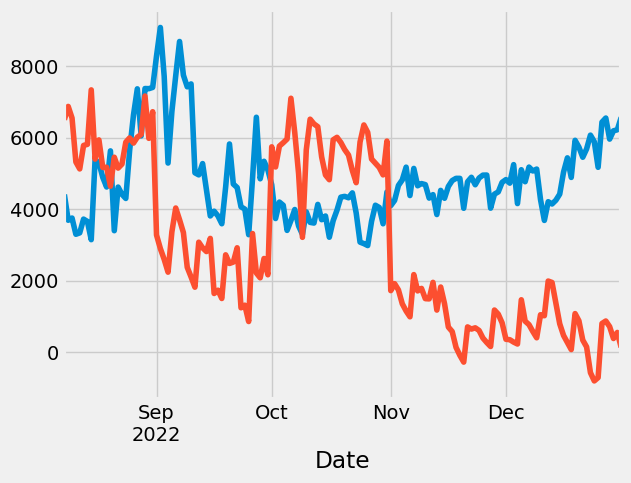

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit


# split the data into training and test sets
train_size = int(len(final_df) * 0.8)
train_data = final_df.iloc[:train_size]
test_data = final_df.iloc[train_size:]

# define the endogenous and exogenous variables for training and testing

train_endog_data = train_data['MCP']
train_exog_data = train_data.drop('MCP', axis=1)
test_endog_data = test_data['MCP']
test_exog_data = test_data.drop('MCP', axis=1)

# fit an ARIMAX model
model = sm.tsa.ARIMA(endog=train_endog_data, exog=train_exog_data, order=(2,1,2))
results = model.fit()

# print model summary
print(results.summary())

# make predictions for the test set
forecast = results.forecast(steps=len(test_data), exog=test_exog_data)

# evaluate the model performance
rmse = ((((test_endog_data - forecast)**2).mean())**0.5)
print('RMSE: ',rmse)

test_endog_data.plot()
forecast.plot()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    MCP   No. Observations:                  584
Model:                ARIMA(3, 0, 23)   Log Likelihood               -4864.909
Date:                Sat, 25 Mar 2023   AIC                           9951.818
Time:                        17:40:12   BIC                          10436.877
Sample:                    01-01-2021   HQIC                         10140.870
                         - 08-07-2022                                         
Covariance Type:                  opg                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        2.471e+07      0.264   9.38e+07      0.000    2.47e+07    2.47e+07
PC_rain1                        

<AxesSubplot: xlabel='Date'>

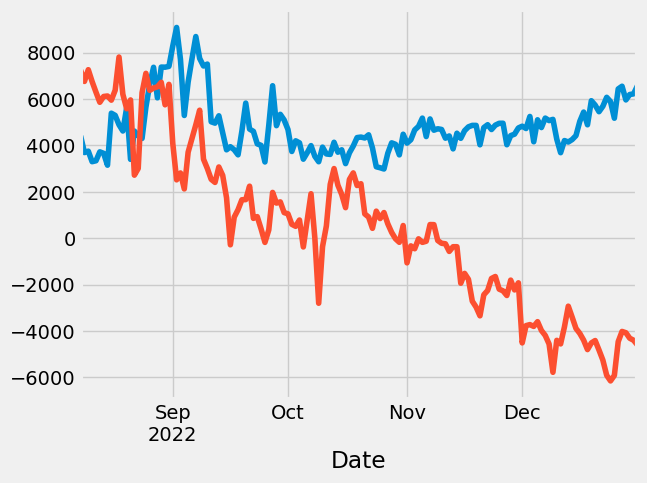

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit


# split the data into training and test sets
train_size = int(len(final_df) * 0.8)
train_data = final_df.iloc[:train_size]
test_data = final_df.iloc[train_size:]

# define the endogenous and exogenous variables for training and testing

train_endog_data = train_data['MCP']
train_exog_data = train_data.drop('MCP', axis=1)
test_endog_data = test_data['MCP']
test_exog_data = test_data.drop('MCP', axis=1)

# fit an ARIMAX model
model = sm.tsa.ARIMA(endog=train_endog_data, exog=train_exog_data, order=(3,0,23))
results = model.fit()

# print model summary
print(results.summary())

# make predictions for the test set
forecast = results.forecast(steps=len(test_data), exog=test_exog_data)

# evaluate the model performance
rmse = ((((test_endog_data - forecast)**2).mean())**0.5)
print('RMSE: ',rmse)

test_endog_data.plot()
forecast.plot()

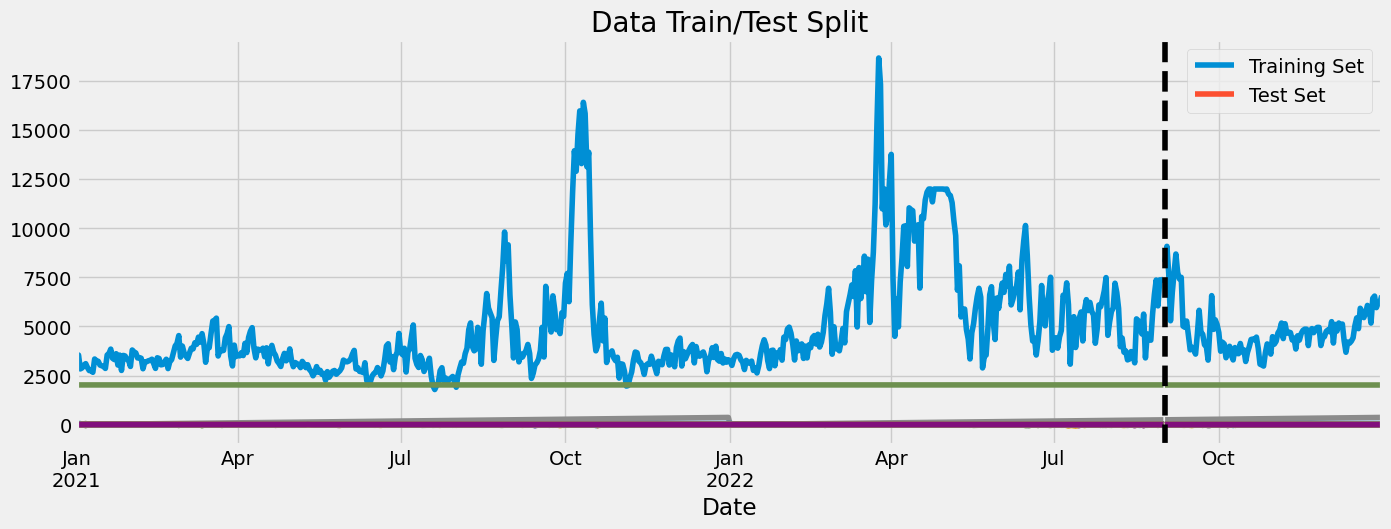

[17:40:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5504.55574	validation_1-rmse:4889.65771
[50]	validation_0-rmse:3485.64681	validation_1-rmse:2443.22071
[100]	validation_0-rmse:2237.96010	validation_1-rmse:1441.15094
[150]	validation_0-rmse:1473.35591	validation_1-rmse:1328.26802
[200]	validation_0-rmse:1008.00397	validation_1-rmse:1440.52683
[237]	validation_0-rmse:784.43270	validation_1-rmse:1594.08619


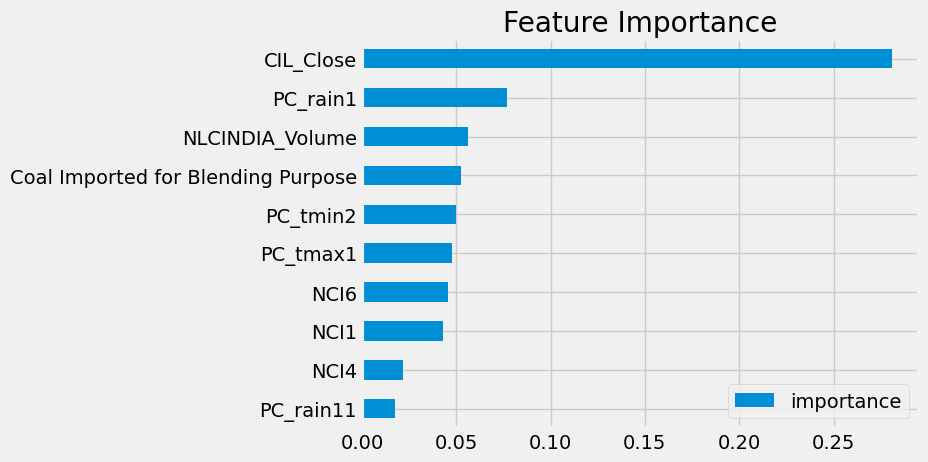

C:\Users\dell\AppData\Local\Temp\ipykernel_22644\2005231893.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


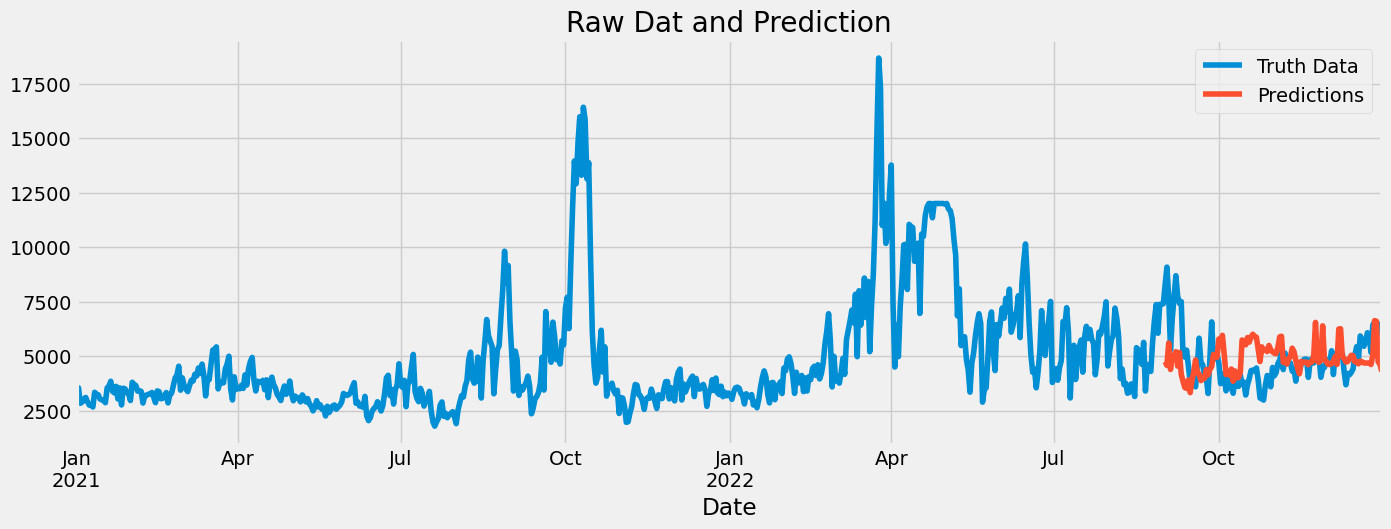

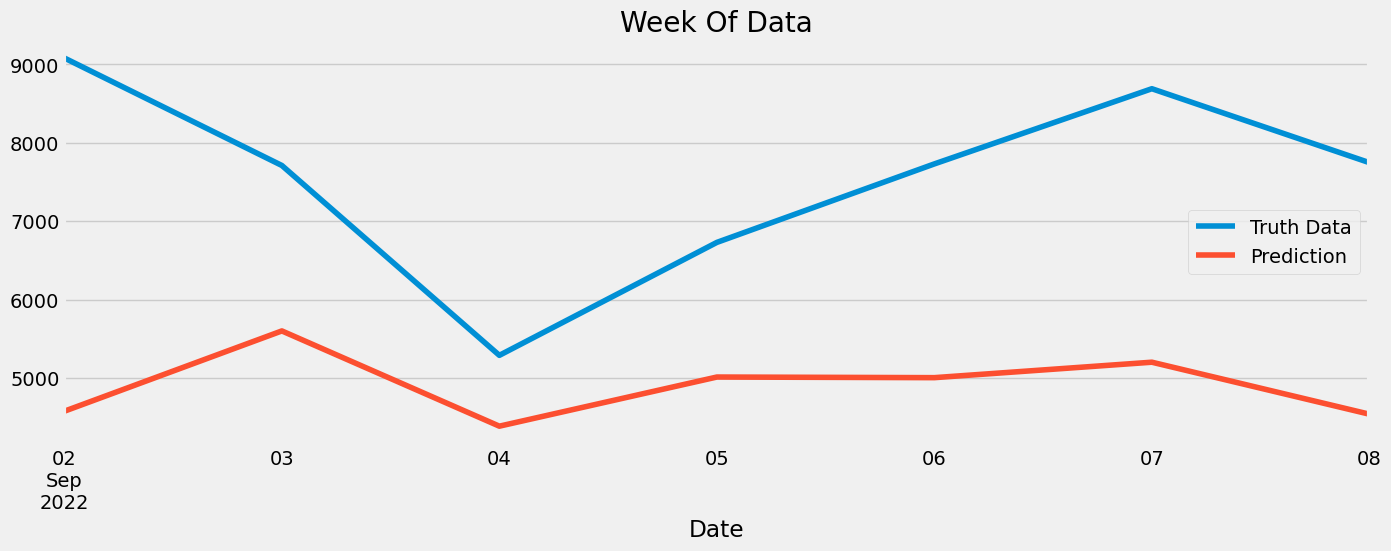

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

train = final_df.loc[df.index < '2022-09-01']
test = final_df.loc[df.index >= '2022-09-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2022-09-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
#     df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

final_df = create_features(final_df)


final_df['weekofyear'] = final_df['weekofyear'].astype('int')
train = final_df.loc[df.index < '2022-09-01']
test = final_df.loc[df.index >= '2022-09-01']


X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]



reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=800,
                       early_stopping_rounds=100,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose=50)

fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi = fi.sort_values('importance')[-10:].copy()
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

test['prediction'] = reg.predict(X_test)
df = final_df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['MCP']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

ax = df.loc[(df.index > '2022-09-01') & (df.index < '2022-09-09')]['MCP'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '2022-09-01') & (df.index < '2022-09-09')]['prediction'] \
    .plot(style='-')
plt.legend(['Truth Data','Prediction'])
plt.show()

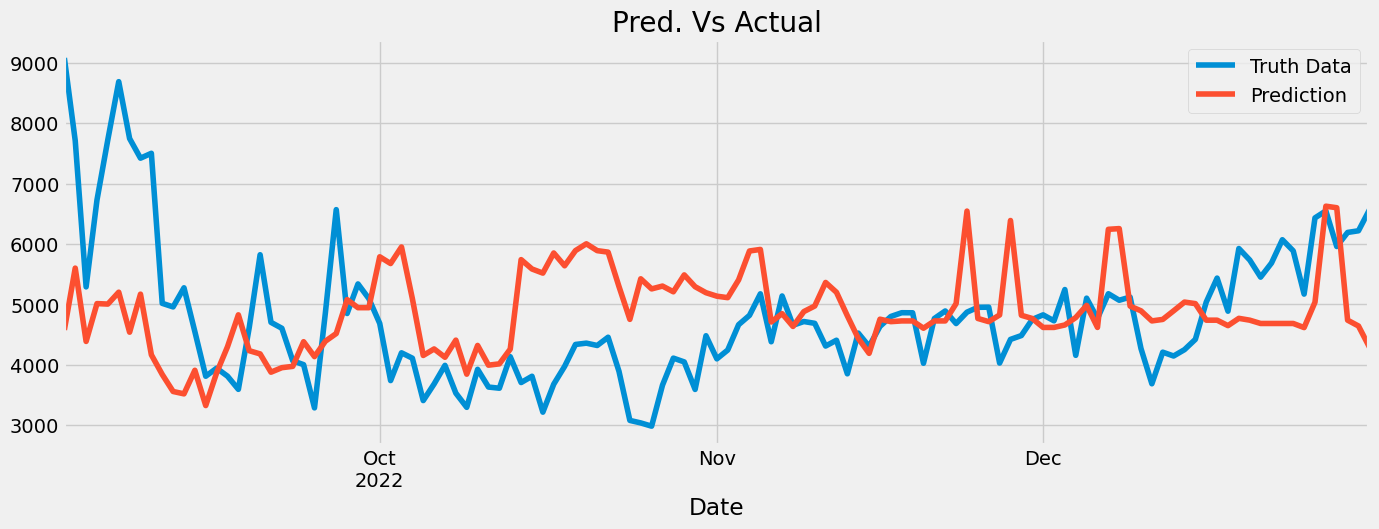

In [42]:
ax = df.loc[(df.index > '2022-09-01') ]['MCP'] \
    .plot(figsize=(15, 5), title='Pred. Vs Actual')
df.loc[(df.index > '2022-09-01')]['prediction'] \
    .plot(style='-')
plt.legend(['Truth Data','Prediction'])
plt.show()

[17:40:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5041.68887	validation_1-rmse:4282.38997
[50]	validation_0-rmse:268.87964	validation_1-rmse:2239.39360
[100]	validation_0-rmse:123.86389	validation_1-rmse:2267.92943
[111]	validation_0-rmse:105.04395	validation_1-rmse:2283.69481


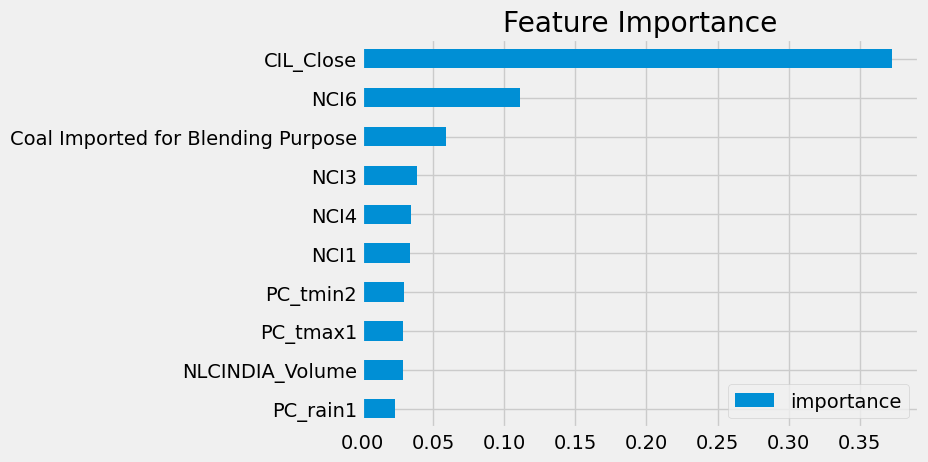

C:\Users\dell\AppData\Local\Temp\ipykernel_22644\838115820.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


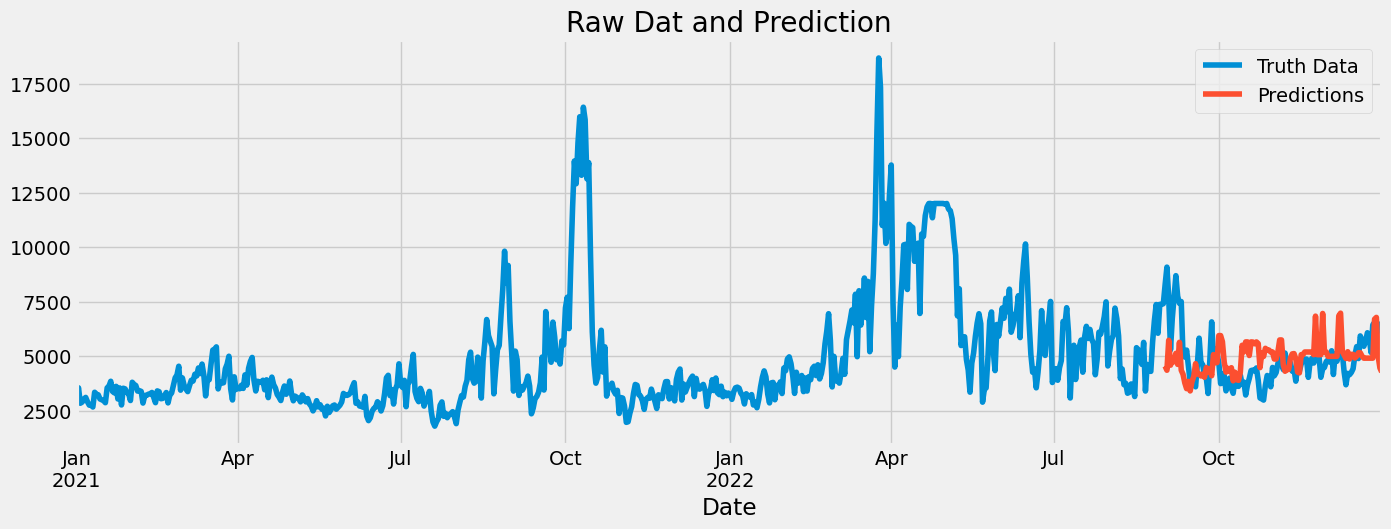

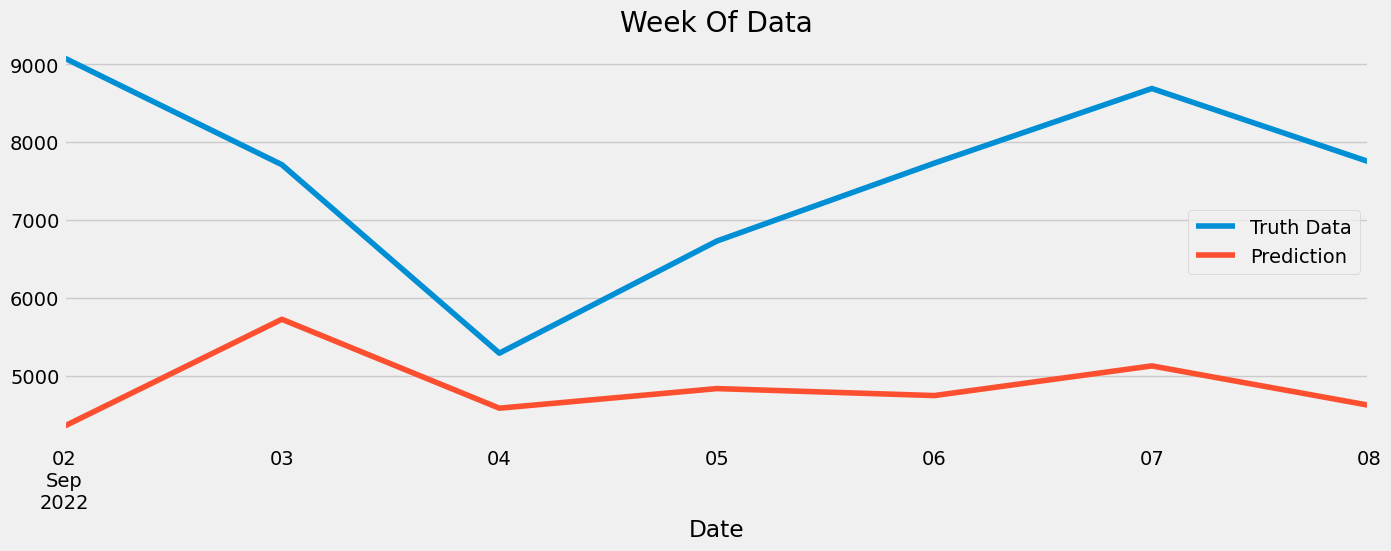

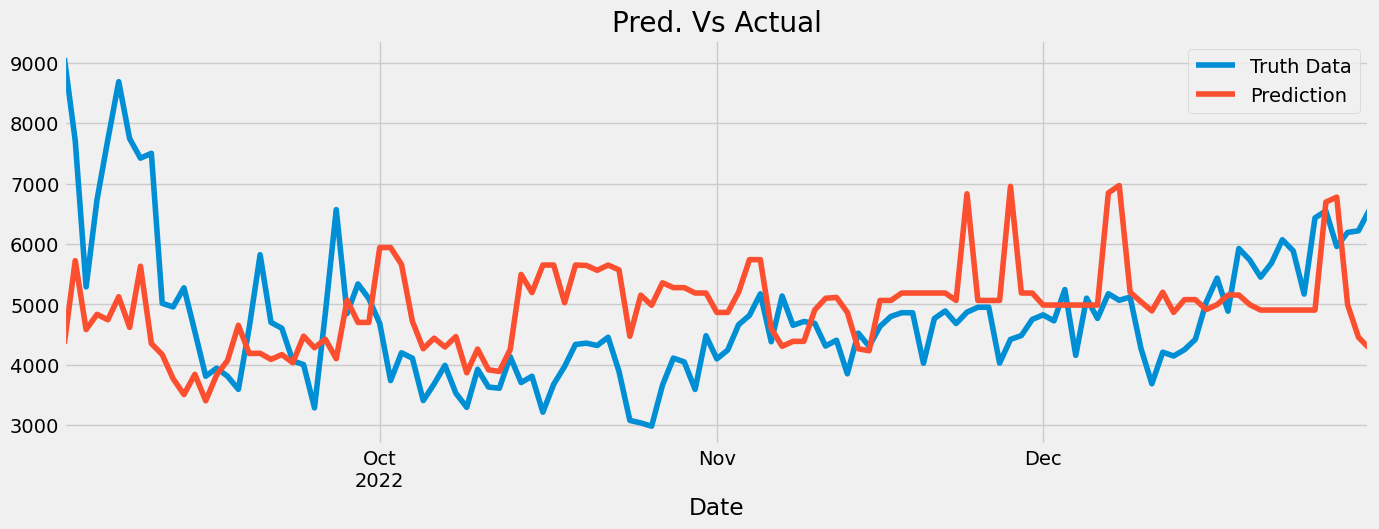

In [43]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=800,
                       early_stopping_rounds=100,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.1)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],verbose=50)


fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi = fi.sort_values('importance')[-10:].copy()
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

test['prediction'] = reg.predict(X_test)
df = final_df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['MCP']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

ax = df.loc[(df.index > '2022-09-01') & (df.index < '2022-09-09')]['MCP'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '2022-09-01') & (df.index < '2022-09-09')]['prediction'] \
    .plot(style='-')
plt.legend(['Truth Data','Prediction'])
plt.show()

ax = df.loc[(df.index > '2022-09-01') ]['MCP'] \
    .plot(figsize=(15, 5), title='Pred. Vs Actual')
df.loc[(df.index > '2022-09-01')]['prediction'] \
    .plot(style='-')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [44]:
final_df

,MCP,PC_rain1,PC_rain2,PC_rain3,PC_rain4,PC_rain5,PC_rain6,PC_rain7,PC_rain8,PC_rain9,...,NCI5,NCI6,NCI7,NCI8,CIL_Close,CIL_Volume,NLCINDIA_Close,NLCINDIA_Volume,GMDCLTD_Close,GMDCLTD_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3268.34,-21.266171,-4.313552,3.014690,3.244470,0.291415,5.572012,2.956230,-1.810250,2.645991,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.147633,-0.626226,-0.899650,-0.614152,-1.153752,0.398913
2021-01-02,3546.05,-20.887104,-3.290372,5.540097,5.621648,-1.858190,1.513024,-2.560670,-2.687907,2.937303,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.147633,-0.626226,-0.899650,-0.614152,-1.153752,0.398913
2021-01-03,2836.93,-17.463403,4.669649,13.329925,-3.271665,-2.400398,1.360517,-2.959798,-1.203030,0.448102,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.147633,-0.626226,-0.899650,-0.614152,-1.153752,0.398913
2021-01-04,2888.83,-13.912759,7.311908,16.030225,-6.070790,3.378868,3.880589,-2.741379,0.907715,-10.860691,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.092184,-0.224805,-0.860838,-0.542486,-1.075087,1.392771
2021-01-05,3030.45,-10.026440,10.402629,25.992325,-16.118522,1.783511,-2.897196,-0.387846,6.475468,-17.271414,...,-1.341316,-0.884302,-1.364135,-1.441477,-1.153470,-0.164505,-0.846284,-0.550090,-1.018747,1.302653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,6548.15,-18.851383,-1.642281,-1.178640,4.659273,2.070546,-1.868302,-3.297574,0.287907,2.263020,...,0.080431,-0.129139,0.275927,0.245414,1.359260,-0.972585,1.729831,-0.119460,0.655528,-0.430442
2022-12-28,5958.41,-20.324016,-3.046191,2.669958,5.019369,-0.342880,0.656024,-2.100995,-1.588338,2.691022,...,0.080431,-0.129139,0.275927,0.245414,1.416168,-0.967949,2.030620,0.006345,0.742696,-0.351782
2022-12-29,6191.27,-21.015679,-3.437649,5.069528,5.733524,-1.767342,1.247579,-2.557714,-2.600855,2.823376,...,0.080431,-0.129139,0.275927,0.245414,1.370933,-0.816091,2.050025,-0.223242,0.760768,-0.534762


In [82]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load data into a pandas DataFrame
df = final_df.copy()

# Select the target variable
target = 'MCP'
data = df[[target]]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define a function to generate input sequences for the LSTM model
def generate_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Generate input sequences for the LSTM model
sequence_length = 5
X_train, y_train = generate_sequences(train_data, sequence_length)
X_test, y_test = generate_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Generate predictions for the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Plot the predictions
import matplotlib.pyplot as plt
plt.plot(data[train_size:].index, y_test, label='Actual MCP')
plt.plot(data[train_size:].index, predictions, label='Predicted MCP')
plt.legend()
plt.show()


Epoch 1/50
19/19 [==============================] - 8s 12ms/step - loss: 0.0224
Epoch 2/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0100
Epoch 3/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0085
Epoch 4/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0083
Epoch 5/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 6/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0079
Epoch 7/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 8/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0075
Epoch 9/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0073
Epoch 10/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 11/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0071
Epoch 12/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0066
Epoch 13/50
19/19 [==================

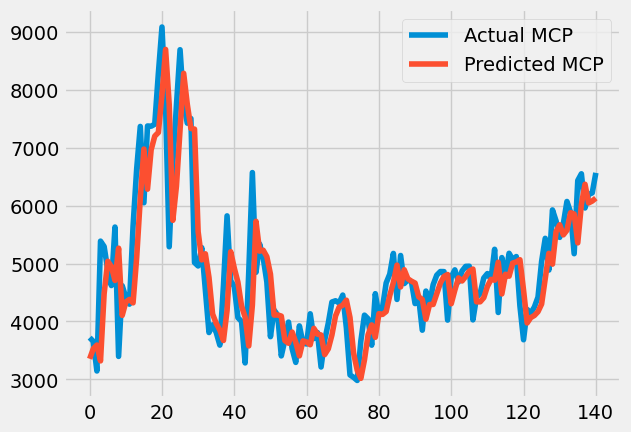

In [87]:
# Plot the predictions
import matplotlib.pyplot as plt
plt.plot( y_test, label='Actual MCP')
plt.plot( predictions, label='Predicted MCP')
plt.legend()
plt.show()


Epoch 1/50
9/9 [==============================] - 9s 221ms/step - loss: 0.0416 - val_loss: 0.0470
Epoch 2/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0213 - val_loss: 0.0085
Epoch 3/50
9/9 [==============================] - 0s 20ms/step - loss: 0.0186 - val_loss: 0.0294
Epoch 4/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0163 - val_loss: 0.0269
Epoch 5/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0151 - val_loss: 0.0230
Epoch 6/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0142 - val_loss: 0.0246
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0133 - val_loss: 0.0221
Epoch 8/50
9/9 [==============================] - 0s 27ms/step - loss: 0.0122 - val_loss: 0.0179
Epoch 9/50
9/9 [==============================] - 0s 21ms/step - loss: 0.0109 - val_loss: 0.0122
Epoch 10/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0102 - val_loss: 0.0116
Epoch 11/50
9/9 [===========

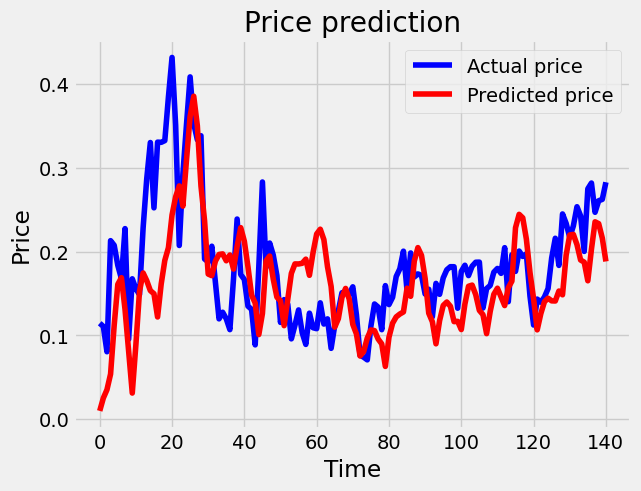

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load data into a pandas DataFrame
df = final_df.copy()

# Select the target variable and exogenous variables
target = 'MCP'
exogenous_cols = ['PC_rain1', 'PC_rain2', 'PC_rain3', 'PC_rain4', 'PC_rain5',
#        'PC_rain6', 'PC_rain7', 'PC_rain8', 'PC_rain9', 'PC_rain10',
#        'PC_rain11', 'PC_rain12', 'PC_rain13', 'PC_rain14', 'PC_rain15',
#        'PC_rain16', 'PC_rain17', 'PC_rain18', 'PC_rain19', 'PC_rain20',
#        'PC_rain21', 'PC_rain22', 'PC_rain23', 'PC_rain24', 'PC_rain25',
#        'PC_rain26', 'PC_rain27', 'PC_rain28', 'PC_rain29', 'PC_rain30',
#        'PC_rain31', 'PC_rain32', 'PC_rain33', 'PC_rain34', 'PC_rain35',
#        'PC_rain36', 'PC_rain37', 'PC_rain38', 'PC_rain39', 'PC_rain40',
#        'PC_rain41', 'PC_rain42', 'PC_rain43', 'PC_rain44', 'PC_rain45',
#        'PC_rain46', 'PC_rain47', 'PC_rain48', 'PC_rain49', 'PC_rain50',
#        'PC_rain51', 'PC_rain52', 'PC_rain53', 'PC_tmin1', 'PC_tmin2',
       'PC_tmin3', 'PC_tmax1', 'PC_tmax2', 'PC_tmax3', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear',
       'Coal Imported by Imported Coal based Plants',
       'Coal Imported for Blending Purpose', 'Total Coal Import', 'NCI1',
#        'NCI2', 'NCI3', 'NCI4', 'NCI5', 'NCI6', 'NCI7', 'NCI8', 'CIL_Close',
#        'CIL_Volume', 'NLCINDIA_Close', 'NLCINDIA_Volume', 'GMDCLTD_Close',
       'GMDCLTD_Volume']
data = df[[target] + exogenous_cols]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define a function to generate input sequences for the LSTM model
def generate_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


# Generate input sequences for the LSTM model
sequence_length = 5
X_train, y_train = generate_sequences(train_data, sequence_length)
X_test, y_test = generate_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual and predicted prices
plt.plot(y_test, color='blue', label='Actual price')
plt.plot(y_pred, color='red', label='Predicted price')
plt.title('Price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load data into a pandas DataFrame
df = final_df.copy()

# Select the target variable and exogenous variables
target = 'MCP'
exogenous_cols = ['PC_rain1', 'PC_rain2', 'PC_rain3', 'PC_rain4', 'PC_rain5',
       'PC_tmin3', 'PC_tmax1', 'PC_tmax2', 'PC_tmax3', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear',
       'Coal Imported by Imported Coal based Plants',
       'Coal Imported for Blending Purpose', 'Total Coal Import', 'NCI1',
       'GMDCLTD_Volume']
data = df[[target] + exogenous_cols]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define a function to generate input sequences for the LSTM model
def generate_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, :])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Generate input sequences for the LSTM model
sequence_length = 5
X_train, y_train = generate_sequences(train_data, sequence_length)
X_test, y_test = generate_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the y_test and y_pred to original values
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler.inverse_transform(y_pred)

# Plot the actual and predicted prices
# plt.plot(y_test_orig, color='blue', label='Actual price')
# plt.plot(y_pred_orig, color='red', label='Predicted price')
# plt.title('Price prediction')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()


Epoch 1/50
9/9 [==============================] - 9s 213ms/step - loss: 0.0371 - val_loss: 0.0498
Epoch 2/50
9/9 [==============================] - 0s 24ms/step - loss: 0.0213 - val_loss: 0.0129
Epoch 3/50
9/9 [==============================] - 0s 23ms/step - loss: 0.0185 - val_loss: 0.0293
Epoch 4/50
9/9 [==============================] - 0s 23ms/step - loss: 0.0165 - val_loss: 0.0283
Epoch 5/50
9/9 [==============================] - 0s 22ms/step - loss: 0.0145 - val_loss: 0.0226
Epoch 6/50
9/9 [==============================] - 0s 23ms/step - loss: 0.0131 - val_loss: 0.0264
Epoch 7/50
9/9 [==============================] - 0s 28ms/step - loss: 0.0133 - val_loss: 0.0099
Epoch 8/50
9/9 [==============================] - 0s 26ms/step - loss: 0.0111 - val_loss: 0.0227
Epoch 9/50
9/9 [==============================] - 0s 23ms/step - loss: 0.0098 - val_loss: 0.0069
Epoch 10/50
9/9 [==============================] - 0s 23ms/step - loss: 0.0086 - val_loss: 0.0086
Epoch 11/50
9/9 [===========

ValueError: non-broadcastable output operand with shape (141,1) doesn't match the broadcast shape (141,22)

In [ ]:
y_test_orig